#*** Heart Disease Prediction***


####**Import Libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### **Read Dataset**

In [3]:
df = pd.read_csv("heart.csv")

###**Exploring dataset**

In [4]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
df.describe(include="object").T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [10]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df.duplicated().sum()

0

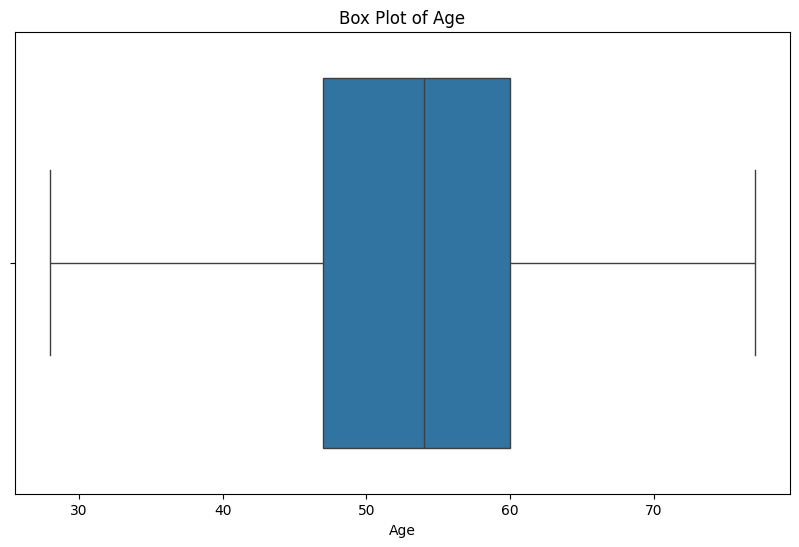

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

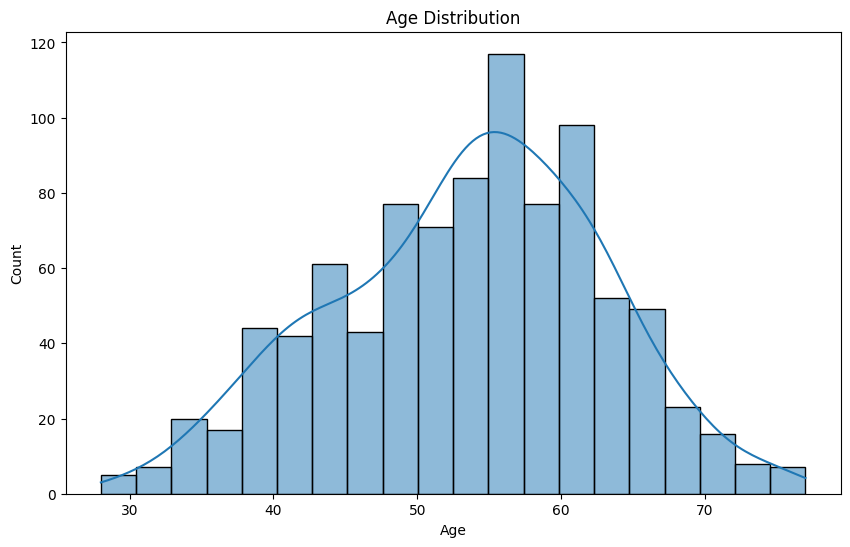

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

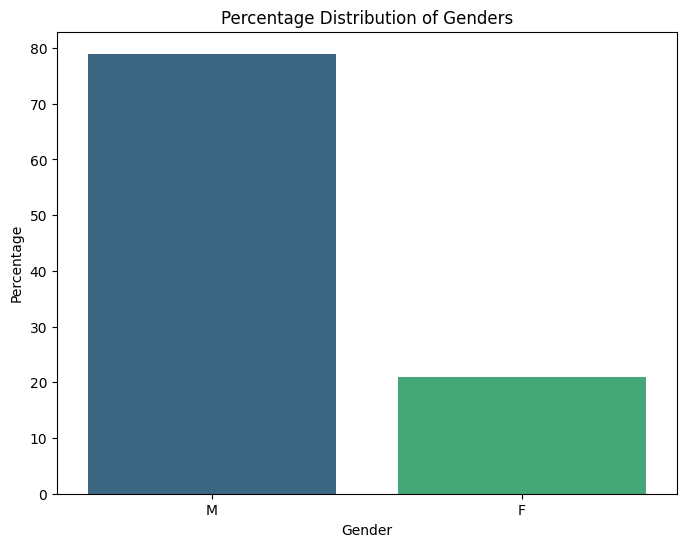

In [14]:
# Calculate the percentage of each gender
gender_counts = df['Sex'].value_counts(normalize=True) * 100

# Plot the percentage distribution of genders
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Percentage Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

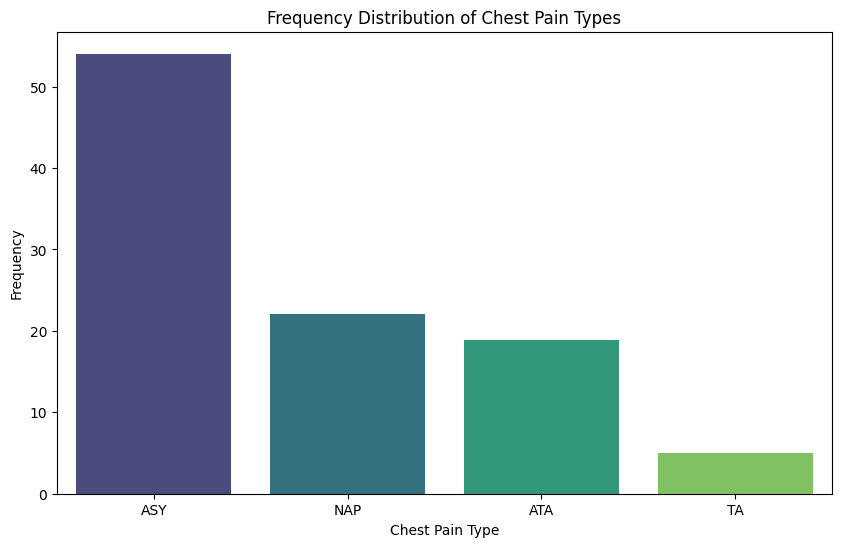

In [15]:
# Calculate the frequency of each chest pain type
chest_pain_counts = df['ChestPainType'].value_counts(normalize =True)*100

# Plot the frequency distribution of chest pain types
plt.figure(figsize=(10, 6))
sns.barplot(x=chest_pain_counts.index, y=chest_pain_counts.values, palette='viridis')
plt.title('Frequency Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

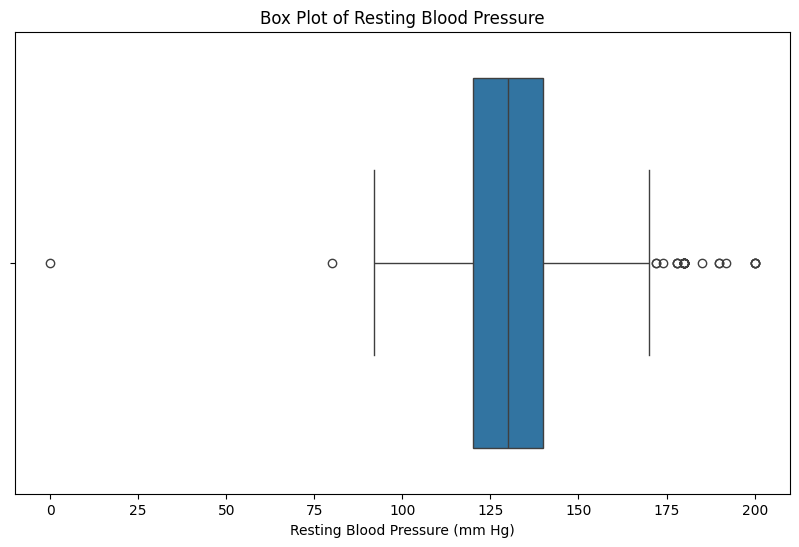

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['RestingBP'])
plt.title('Box Plot of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.show()

###The Boxplot indicating Resting Blood Pressure above 170 is a outlier also high blood pressure could causes Heart Disease

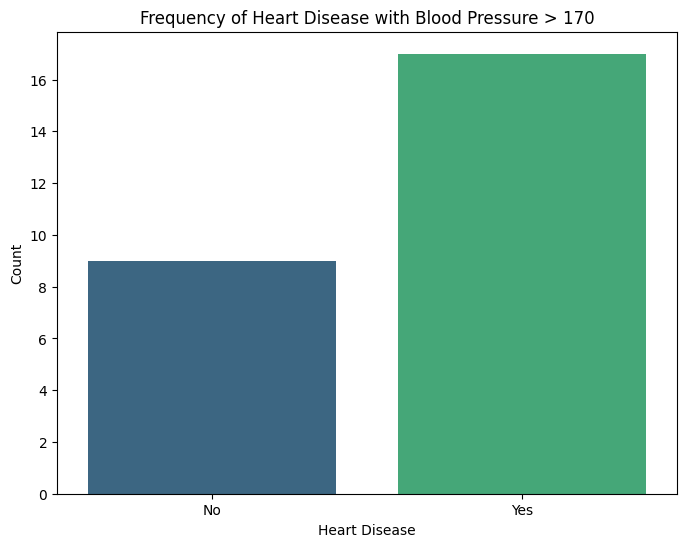

In [17]:
# Filter data for blood pressure greater than 170
high_bp = df[df['RestingBP'] > 170]

# Plot 1: Frequency of heart disease with blood pressure greater than 170
plt.figure(figsize=(8, 6))
sns.countplot(data=high_bp, x='HeartDisease', palette='viridis')
plt.title('Frequency of Heart Disease with Blood Pressure > 170')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


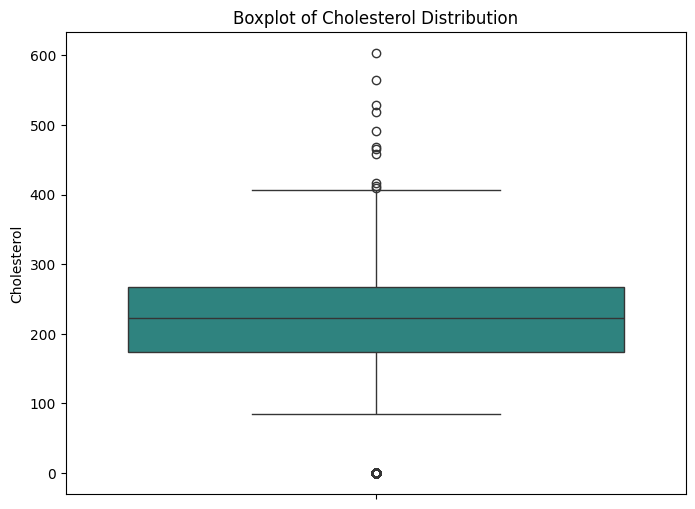

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Cholesterol', palette='viridis')
plt.title('Boxplot of Cholesterol Distribution')
plt.ylabel('Cholesterol')
plt.show()

### The boxplot indicating cholesterol above 405 is outlier also high level of cholesterol increases the riskof Heart Disease

In [19]:
# data for cholesterol greater than 405
high_chol = df[df['Cholesterol']> 405]["HeartDisease"].value_counts()

high_chol

HeartDisease
1    7
0    5
Name: count, dtype: int64

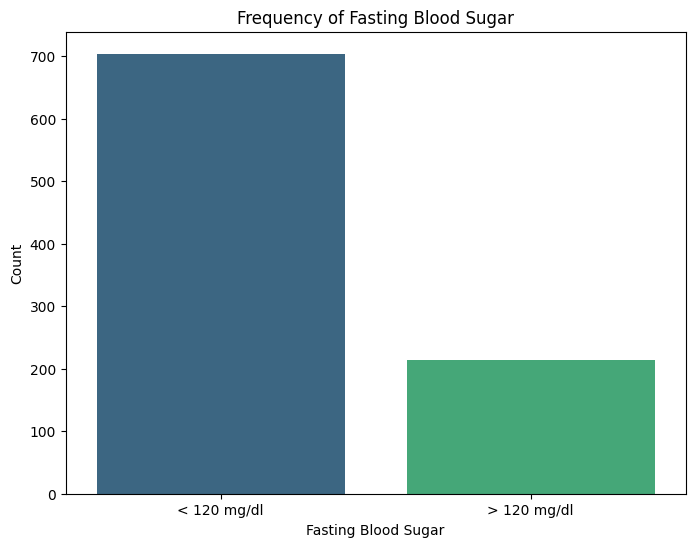

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FastingBS', palette='viridis')
plt.title('Frequency of Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['< 120 mg/dl', '> 120 mg/dl'])
plt.show()

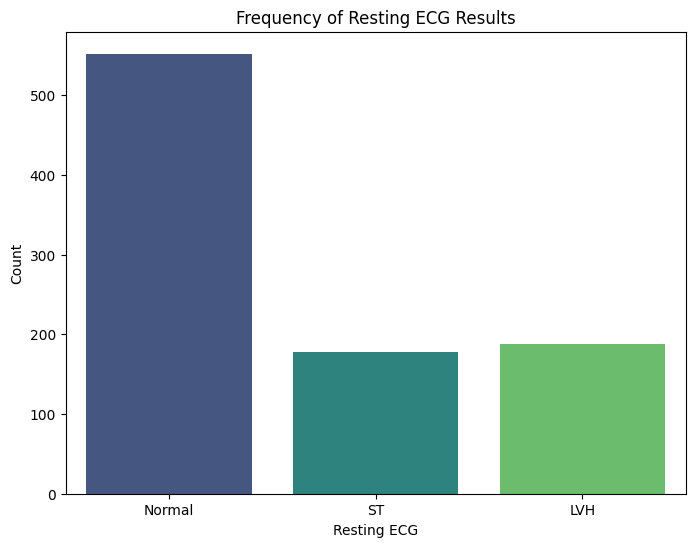

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RestingECG', palette='viridis')
plt.title('Frequency of Resting ECG Results')
plt.xlabel('Resting ECG')
plt.ylabel('Count')
plt.show()

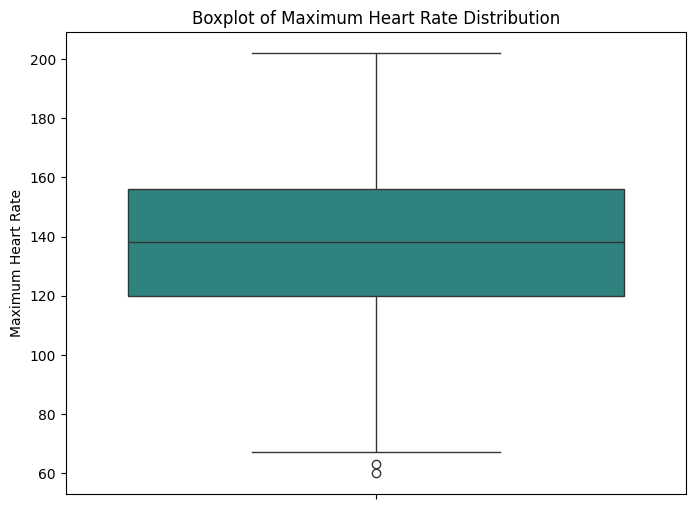

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='MaxHR', palette='viridis')
plt.title('Boxplot of Maximum Heart Rate Distribution')
plt.ylabel('Maximum Heart Rate')
plt.show()


In [23]:
df[df["MaxHR"] < 65]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


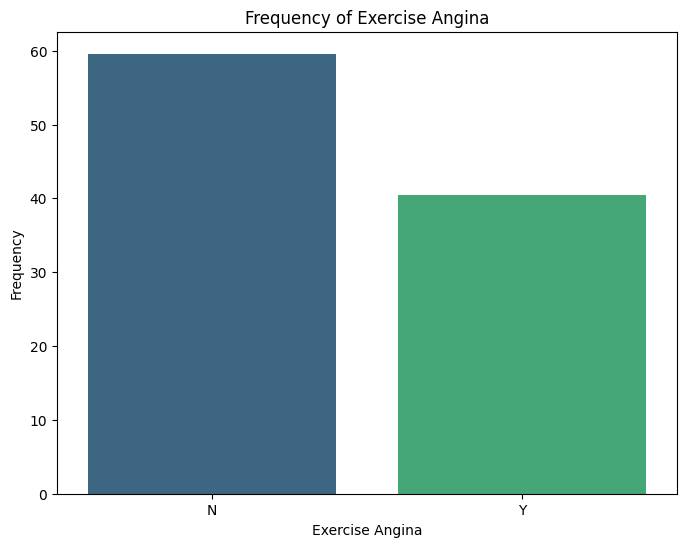

In [24]:
# Calculate the frequency of exercise angina
angina_frequency = df['ExerciseAngina'].value_counts(normalize=True) * 100

# the frequency distribution of exercise angina
plt.figure(figsize=(8, 6))
sns.barplot(x=angina_frequency.index, y=angina_frequency.values, palette='viridis')
plt.title('Frequency of Exercise Angina')
plt.xlabel('Exercise Angina')
plt.ylabel('Frequency')
plt.show()


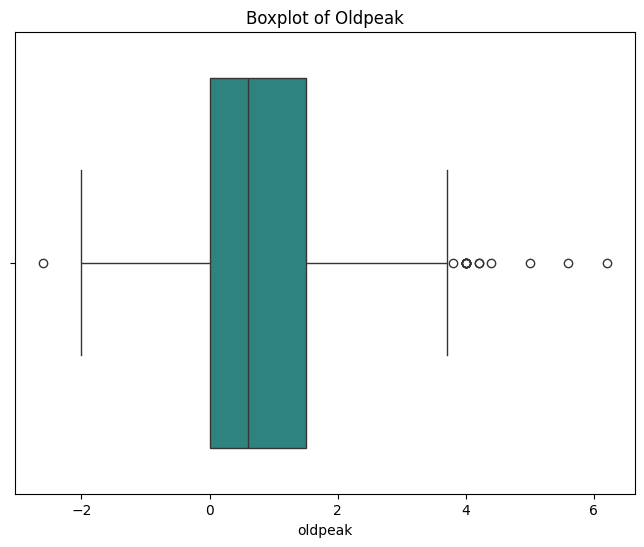

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,x='Oldpeak', palette='viridis')
plt.title('Boxplot of Oldpeak')
plt.xlabel('oldpeak')
plt.show()


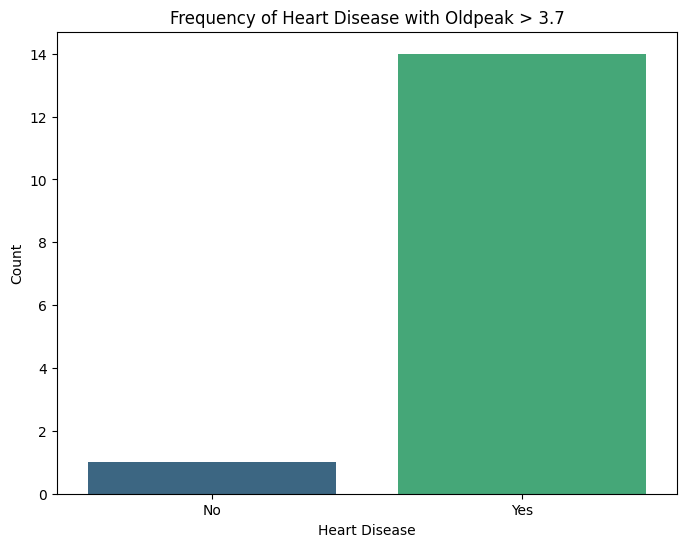

In [26]:

# Filter data for oldpeak greater than 3.7
high_oldpeak = df[df['Oldpeak'] > 3.7]

# Frequency of heart disease with oldpeak greater than 3.7
plt.figure(figsize=(8, 6))
sns.countplot(data=high_oldpeak, x='HeartDisease', palette='viridis')
plt.title('Frequency of Heart Disease with Oldpeak > 3.7')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


In [27]:
high_st_slope = df["ST_Slope"].value_counts(normalize=1) * 100

high_st_slope


ST_Slope
Flat    50.108932
Up      43.028322
Down     6.862745
Name: proportion, dtype: float64

In [28]:
target_var = df["HeartDisease"].value_counts(normalize=1) * 100
target_var

HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64

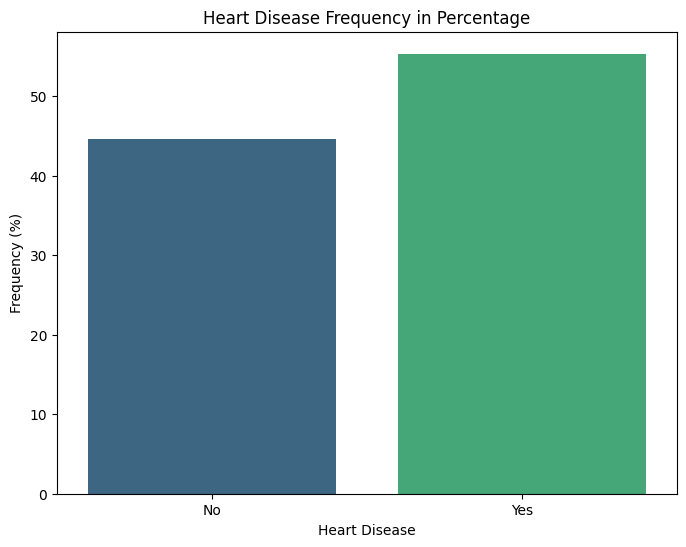

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x=target_var.index, y=target_var.values, palette='viridis')

# Customize plot
plt.title('Heart Disease Frequency in Percentage')
plt.xlabel('Heart Disease')
plt.ylabel('Frequency (%)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


In [30]:
HD_ratio = df.groupby("Sex", as_index=False)["HeartDisease"].value_counts(normalize=1)
HD_ratio["HeartDisease"] = HD_ratio["HeartDisease"].map(lambda x: "Heart Disease" if x == 1 else "No Heart Disease")
HD_ratio["proportion"] = np.round(HD_ratio["proportion"] *100, 2)
HD_ratio.sort_index(ascending=False, inplace=True)
HD_ratio.reset_index(drop=True)

,Sex,HeartDisease,proportion
0,M,No Heart Disease,36.83
1,M,Heart Disease,63.17
2,F,Heart Disease,25.91
3,F,No Heart Disease,74.09


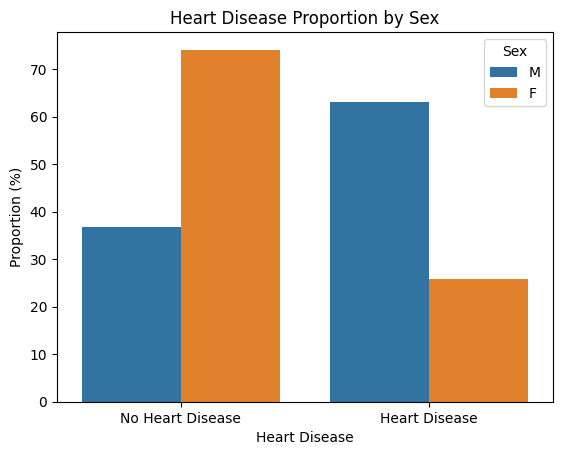

In [31]:
# prompt: plot with HD_ratio = df.groupby("Sex", as_index=False)["HeartDisease"].value_counts(normalize=1)
# HD_ratio["HeartDisease"] = HD_ratio["HeartDisease"].map(lambda x: "Heart Disease" if x == 1 else "No Heart Disease")
# HD_ratio["proportion"] = np.round(HD_ratio["proportion"] *100, 2)
# HD_ratio.sort_index(ascending=False, inplace=True)
# HD_ratio.reset_index(drop=True)

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="HeartDisease", y="proportion", hue="Sex", data=HD_ratio)

# Customize the plot
plt.title("Heart Disease Proportion by Sex")
plt.xlabel("Heart Disease")
plt.ylabel("Proportion (%)")
plt.legend(title="Sex")
plt.show()


In [32]:
# Calculate the percentage of each chest pain type among patients with heart disease
chest_pain_heart_disease = (df[df["HeartDisease"] == 1]["ChestPainType"].value_counts(normalize=True) * 100)

print("Percentage of chest pain types among patients with heart disease:")
print(chest_pain_heart_disease)


Percentage of chest pain types among patients with heart disease:
ChestPainType
ASY    77.165354
NAP    14.173228
ATA     4.724409
TA      3.937008
Name: proportion, dtype: float64


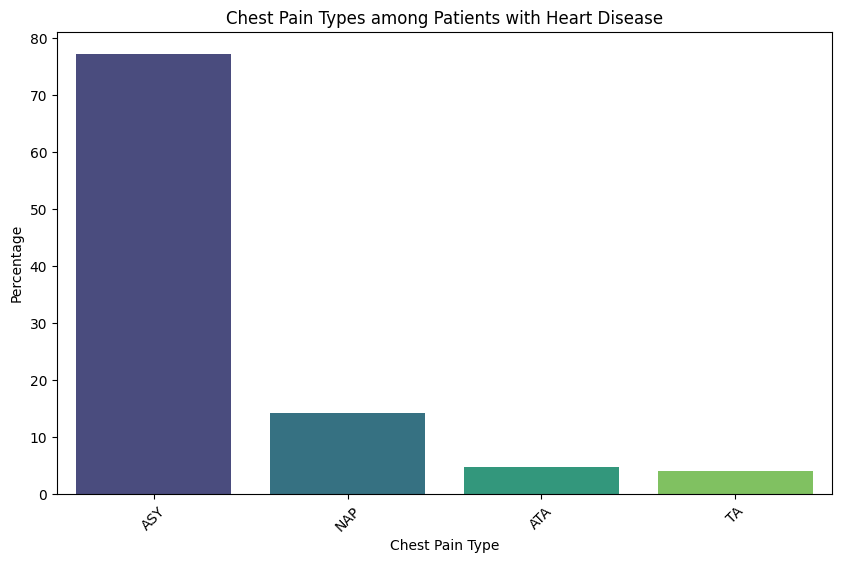

In [33]:
chest_pain_types = chest_pain_heart_disease.index.to_list()
percentages = chest_pain_heart_disease.values.tolist()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=chest_pain_types, y=percentages, palette='viridis')

# Customize the plot
plt.title('Chest Pain Types among Patients with Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


In [34]:
ExerciseAngina_heart_disease = (df[df["HeartDisease"] == 1]["ExerciseAngina"].value_counts(normalize=True) * 100)
ExerciseAngina_heart_disease

ExerciseAngina
Y    62.204724
N    37.795276
Name: proportion, dtype: float64

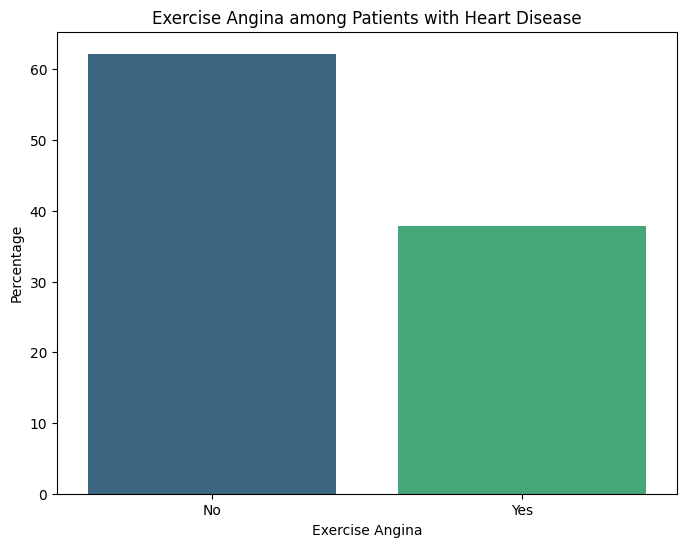

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x=ExerciseAngina_heart_disease.index, y=ExerciseAngina_heart_disease.values, palette='viridis')

# Customize the plot
plt.title('Exercise Angina among Patients with Heart Disease')
plt.xlabel('Exercise Angina')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


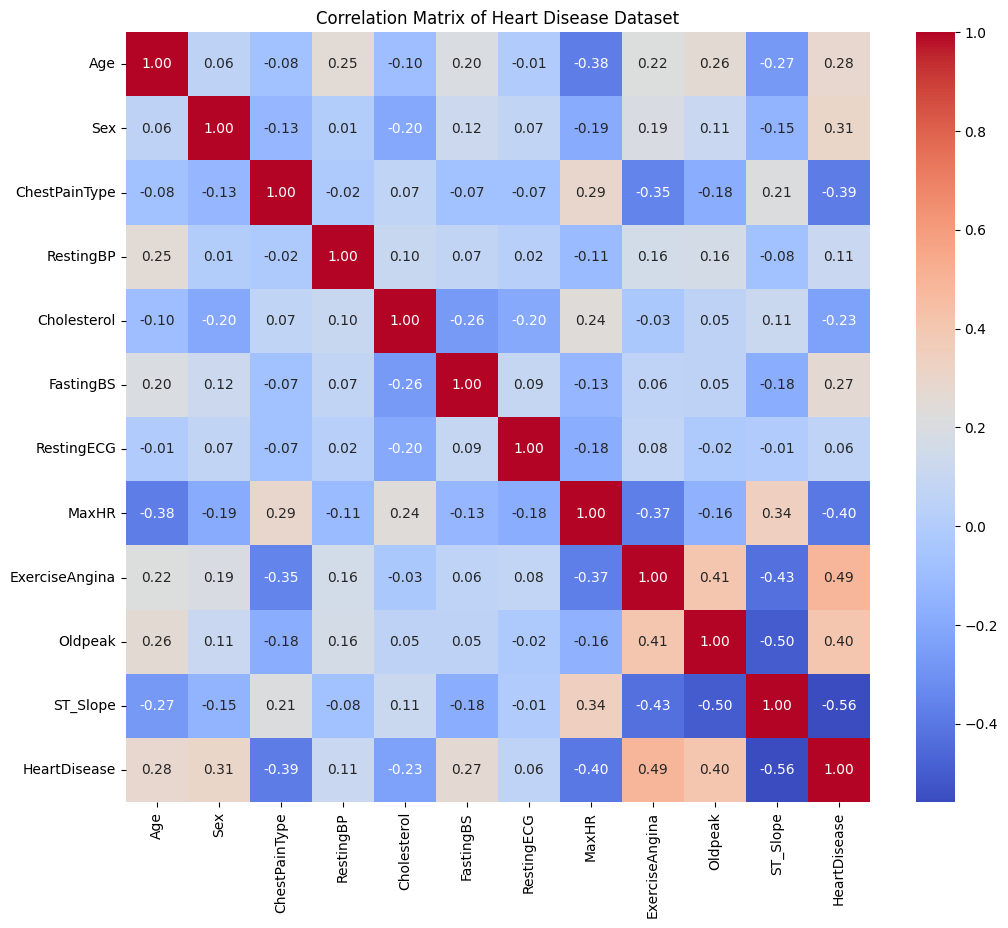

In [36]:
heart_data_encoded =df.copy()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for column in categorical_columns:
    heart_data_encoded[column] = heart_data_encoded[column].astype('category').cat.codes

# Plot the correlation matrix of the dataset
plt.figure(figsize=(12, 10))
correlation_matrix = heart_data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()

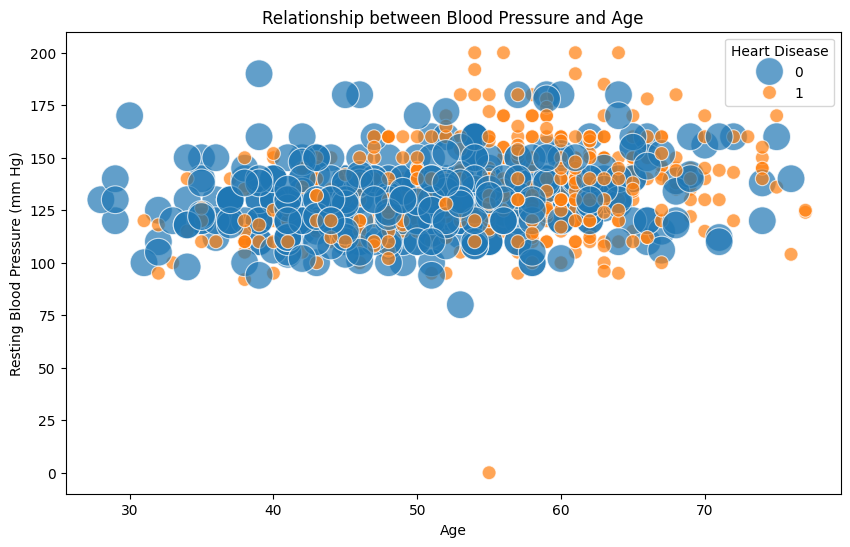

In [37]:
# prompt: Relation Between blood pressure and age scatterplot ,with bubble showin heart desease in red and no heart desaease in blue

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatterplot with bubble size based on heart disease
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Age",
    y="RestingBP",
    hue="HeartDisease",
    size="HeartDisease",
    sizes=(100, 400),
    alpha=0.7,
)

# Customize the plot
plt.title("Relationship between Blood Pressure and Age")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure (mm Hg)")
plt.legend(title="Heart Disease")
plt.show()


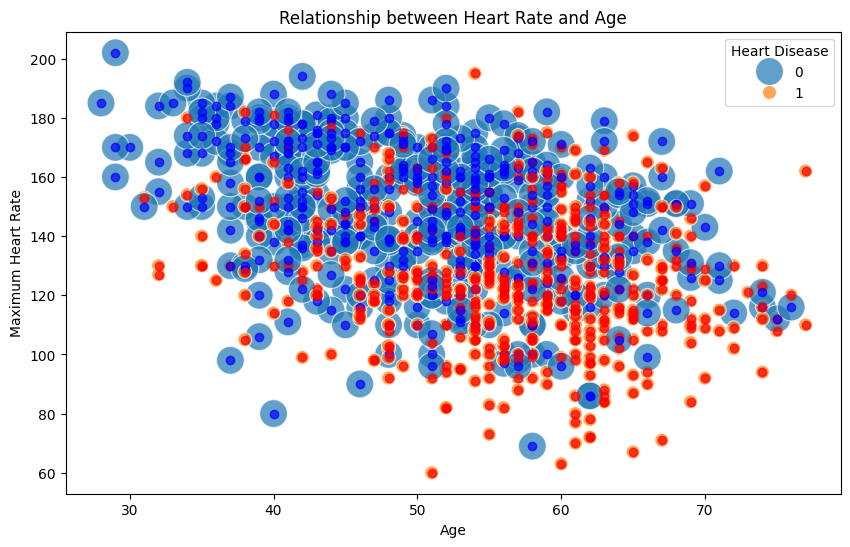

In [38]:
# prompt: relation between heart rate and age with bubble heart desease red no heart desease blue color

import matplotlib.pyplot as plt
# Create a scatterplot with bubble size based on heart disease
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Age",
    y="MaxHR",
    hue="HeartDisease",
    size="HeartDisease",
    sizes=(100, 400),
    alpha=0.7,
)

# Customize the plot
plt.title("Relationship between Heart Rate and Age")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(title="Heart Disease")

# Set color for heart disease and no heart disease
heart_disease_color = 'red'
no_heart_disease_color = 'blue'

# Set color based on heart disease
for i, row in df.iterrows():
    if row['HeartDisease'] == 1:
        plt.scatter(row['Age'], row['MaxHR'], color=heart_disease_color, alpha=0.7)
    else:
        plt.scatter(row['Age'], row['MaxHR'], color=no_heart_disease_color, alpha=0.7)

plt.show()


In [41]:
heart_data_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [42]:
X = heart_data_encoded.drop(columns=["HeartDisease"])
y = heart_data_encoded["HeartDisease"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=69)

# Define the hyperparameters and their values to be tuned
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with the Random Forest model and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation Score: 0.8779011953877077
Test Accuracy: 0.8652173913043478
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        94
           1       0.89      0.88      0.88       136

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.87      0.87      0.87       230



In [51]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np

# Create a copy of the original dataframe for feature engineering
df_fe = heart_data_encoded.copy()

# Binning Age into categories
bins = [0, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df_fe['AgeGroup'] = pd.cut(df_fe['Age'], bins=bins, labels=labels)

# One-Hot Encoding for the new AgeGroup feature
df_fe = pd.get_dummies(df_fe, columns=['AgeGroup'], drop_first=True)

# Polynomial Features for selected numerical columns
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
poly_features = poly.fit_transform(df_fe[numerical_features])
poly_feature_names = poly.get_feature_names_out(numerical_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_fe.index)

# Concatenate the original dataframe with the polynomial features
df_fe = pd.concat([df_fe, df_poly], axis=1)
df_fe.drop(columns=numerical_features, inplace=True)

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_fe.drop(columns='HeartDisease'))
df_fe_scaled = pd.DataFrame(scaled_features, columns=df_fe.columns[:-1], index=df_fe.index)
df_fe_scaled['HeartDisease'] = df_fe['HeartDisease']

# Define the feature matrix and target vector for the engineered dataset
X_fe = df_fe_scaled.drop(columns='HeartDisease')
y_fe = df_fe_scaled['HeartDisease']

# Split the data into training and testing sets
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=69)

# Initialize the Random Forest classifier with the best parameters from previous search
rf_fe = RandomForestClassifier(**best_params, random_state=42)

# Train the model on the engineered dataset
rf_fe.fit(X_train_fe, y_train_fe)

# Evaluate the model on the test data
y_pred_fe = rf_fe.predict(X_test_fe)

print("Test Accuracy with Feature Engineering:", accuracy_score(y_test_fe, y_pred_fe))
print("Classification Report with Feature Engineering:\n", classification_report(y_test_fe, y_pred_fe))

Test Accuracy with Feature Engineering: 0.8804347826086957
Classification Report with Feature Engineering:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        78
           1       0.92      0.87      0.89       106

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [55]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the average cross-validation score
average_cv_score = np.mean(cv_scores)

print("Average Cross-Validation Score:", average_cv_score)


Average Cross-Validation Score: 0.8677245318946365


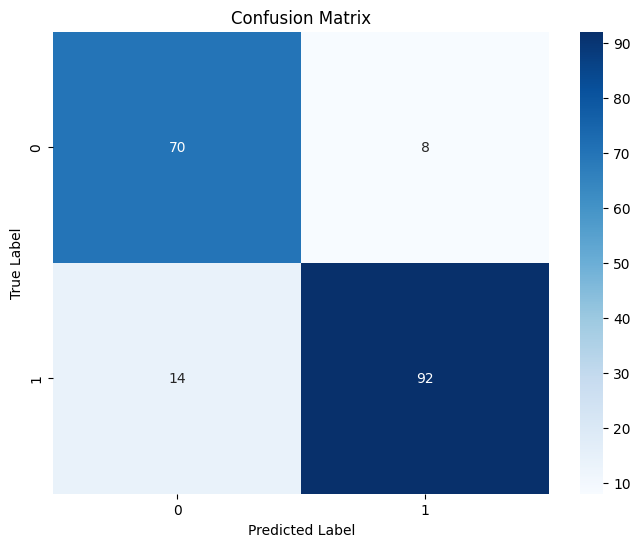

In [54]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_fe, y_pred_fe)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [57]:
import joblib

# Save the model to a file
joblib.dump(rf_fe, 'heart_disease_model.pkl')

print("Model saved successfully!")


Model saved successfully!
